<a href="https://colab.research.google.com/github/Saputoa21/ADS_2024_Saputoa/blob/master/exercises/HomeExercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Exericse 2: Word Embeddings
In this second home exercise, you will use the knowledge from Tutorial 3 to perform a more systematic evaluation of embeddings based on a small analogy dataset.

In this notebook, please complete all instructions starting with 👋 ⚒ in the code cell after the sign or provide your analysis in the text cell after the sign.

## **Word2Vec Analogy-based Evaluation**

We first need to load the pretrained embeddings and the dataset. The dataset can be found on [GitHub](https://github.com/dgromann/cl_intro_ws2024/blob/main/exercises/HomeExercise2.txt) and will be loaded directly from there.

In [1]:
!wget https://github.com/dgromann/cl_intro_ws2024/raw/main/word2vec_embeddings.bin
!wget !wget https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/master/exercises/HomeExercise2.txt

--2024-11-22 22:03:23--  https://github.com/dgromann/cl_intro_ws2024/raw/main/word2vec_embeddings.bin
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/main/word2vec_embeddings.bin [following]
--2024-11-22 22:03:24--  https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/main/word2vec_embeddings.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96769269 (92M) [application/octet-stream]
Saving to: ‘word2vec_embeddings.bin’

word2vec_embeddings 100%[===================>]  92.29M   175MB/s    in 0.5s    

2024-11-22 22:03:27 (175 MB/s) - ‘word2vec_embeddings.bin’ saved

Then we need to load the model with gensim so that we can access the embeddings.

In [14]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format("word2vec_embeddings.bin", binary=True)

And we need to open the HomeExercise2.txt file that contains analogy pairs.

In [15]:
analogy = open("HomeExercise2.txt", "r")
analogy_lines = analogy.readlines()

To look at the first few lines, the following code can be used. The analogies are grouped by categories that is indicated on the line before the analogies are listed with a colon :. The last and fourth element of the line represents the true result we will use to evaluate the embedding model.

In [13]:
line_no = 0
for line in analogy_lines:
  line_no += 1
  print(f"Line number {line_no} with analogy {line}")
  if line_no == 5:
    break

Line number 1 with analogy : capital-common-countries

Line number 2 with analogy Athens Greece Baghdad Iraq

Line number 3 with analogy Athens Greece Berlin Germany

Line number 4 with analogy Athens Greece Cairo Egypt

Line number 5 with analogy Athens Greece Canberra Australia



In [7]:
print(analogy_lines[:3])

[': capital-common-countries\n', 'Athens Greece Baghdad Iraq\n', 'Athens Greece Berlin Germany\n']


👋 ⚒ Systematically evaluate this simple word embedding model based on the entire analogy dataset. To do this:


*   Use the analogy function from Tutorial 3 to obtain 'd'
*   Compare 'd' with the true result from the `HomeExercise1.txt` file
*   Calculate the accuracy for all analogies (how many times out of all attempts did the embedding model provide the correct result)
*   Calculate the accuracy for each analogy category separately

When parsing the file, pay attention to the lines indicated with the colon : that represent the analogy categories and not analogies.


In [ ]:
# Your code here
# Example: Athens is to Greece as Baghdad is to ?
# True result from file: Iraqi
# Model result also Iraqi

def analogy_function(a, b, c):
  result = model.most_similar(positive=[b,c], negative=[a])
  return result[0][0]

def calculate_accuracy(analogy, analogy_function, analogy_lines):
  total_correct = 0
  total_analogies = len(analogy_lines)
  for analogy in analogy_lines:
    if ':' in analogy:
      continue
    else:
      true_result = analogy[-1]
      predicted_result = analogy_function(analogy[1], analogy[2], analogy[0])
      if predicted_result == true_result:
        total_correct += 1

analogy1 = analogy_lines[1]

print(analogy_function("Athens", "Greece", "Baghdad"))
print(calculate_accuracy(analogy, analogy_function, analogy_lines))

Iraqi


## **Comparison: GloVe Analogy-based Evaluation**

The next step will consist of comparing this very small word2vec embedding model with a different small but more powerfull model available in gensim.

All models and corpora available in gensim can be found [here](https://github.com/piskvorky/gensim-data).

Since this model is considerably bigger than the tiny word2vec model, it takes some time to load when you run the following code cell.

In [ ]:
import gensim.downloader as api
from gensim.models import KeyedVectors

model_glove = api.load("glove-wiki-gigaword-100")
print(type(model))

[==================================================] 100.0% 128.1/128.1MB downloaded
<class 'gensim.models.keyedvectors.KeyedVectors'>


The model can then be used exactly the same as the word2vec model, since gensim standardizes model access.

In [ ]:
model_glove["bread"]

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

👋 ⚒  Run the same systematic analysis for this gensim model as for the word2vec model above. Which model performs better overall and in specific categories?

In [ ]:
# Your code here
def analogy(a, b, c):
  #Your code goes here
  result = model_glove.most_similar(positive=[b,c], negative=[a], topn=5)
  return result[0][0]

print(analogy("Athens", "Greece", "Baghdad"))

## **Visual Comparison**

As a final step, use the visualization from Tutorial 3 to visually output the two models based on the following words.

👋 ⚒  ❓ Do the clusters (groupings of embeddings) in the GloVe visualization differ substantially from the clusters in the word2vec visualization from Tutorial 3?

In [ ]:
import numpy as np

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

def display_pca_scatterplot(model, words):

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

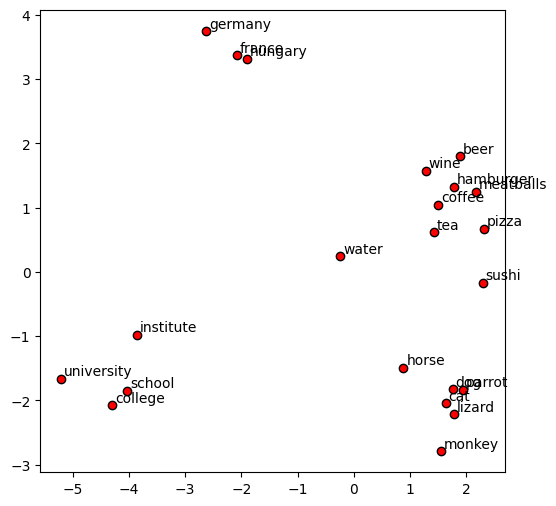

In [ ]:
display_pca_scatterplot(model_glove,
                        ['coffee', 'tea', 'beer', 'wine', 'water',
                         'hamburger', 'pizza',  'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'lizard',
                         'france', 'germany', 'hungary',
                         'school', 'college', 'university', 'institute'])

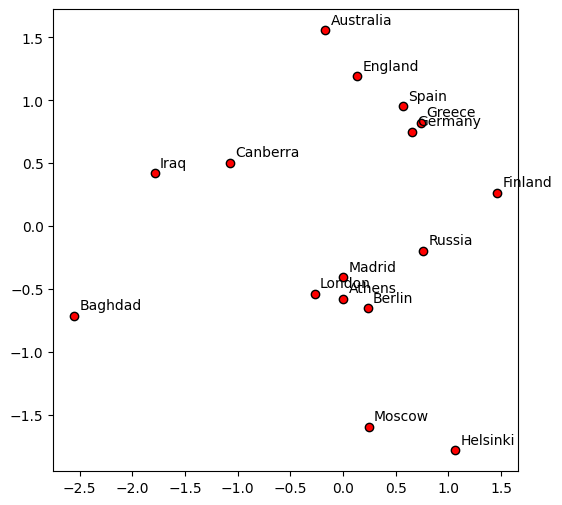

In [ ]:
display_pca_scatterplot(model,
                        ['Athens', 'Greece', 'Baghdad', 'Iraq' ,
                         'Berlin', 'Germany', 'Canberra', 'Australia',
                         'Helsinki', 'Finland', 'London', 'England',
                         'Madrid', 'Spain', 'Moscow', 'Russia'])

**Provide your answer to the question on the clusters here.**

## **Bias in Embeddings**

Language models and also embedding models tend to reflect on bias that is present in the textual data they were trained on. This can also be analyzed with embeddings by explicitly testing biased analogies.

For instance, man is to doctor as woman is to ?

The bias here is that professions tend to be assigned a specific gender, e.g. men are doctors and women are nurses.

The same is true for cultures and cultural bias, e.g. Bratwurst or Sauerkraut and Germany.



In [ ]:
result1 = model_glove.most_similar(positive=["doctor", "woman"], negative=["man"], topn=3)
print(f"man is to doctor as woman is to {result1}")
result2 = model_glove.most_similar(positive=["bratwurst", "france"], negative=["germany"], topn=3)
print(f"Germany is to Bratwurst as France is to {result2}")

👋 ⚒ Try to come up with two biased analogies yourself and test if the GloVe and word2vec models suffers from this type of bias. Please try to be creative and do not just change woman to girl and man to boy or something similar.

In [ ]:
# Test your biased analogies on both models here